# Objective of Data Collection: 
Collecting this data aims to help predict the likelihood of heart disease in patients by analyzing key health factors like age, cholesterol levels, blood pressure, and symptoms experienced during exercise. By gathering this information, the aim is to identify individuals at risk early on, so that preventive measures and treatments can be provided promptly. This data can be used for classification to build models that assist healthcare providers in making better decisions, as well as for clustering to discover patterns and subgroups within the patient population. Ultimately, this improves patient outcomes and reduces the number of heart-related deaths. 

### The source of dataset:
https://www.kaggle.com/code/parsalatifi/heart-failure-prediction-95-accuracy-score

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('/drive/IT326 project/HeartFailure.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


## General Information 

In [7]:
num_attributes = data.shape[1]  
num_objects = data.shape[0] 
attribute_types = data.dtypes.to_frame(name='Data Types')
class_name = data.columns[-1]  
class_label = data.columns[-1]

print("General information: \n")
print(f"\033[1mNumber of attributes:\033[0m {num_attributes}\n")
print(f"\033[1mNumber of objects:\033[0m {num_objects}\n")
print(f"\033[1mClass lable: \033[0m{class_label}\n")
print(f"\033[1mAttribute types:\033[0m")
print(attribute_types)

General information: 

Number of attributes: 12

Number of objects: 918

Class lable: HeartDisease

Attribute types:
               Data Types
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64


### Sample

In [11]:
sample=data.sample(n=20);
print(sample);

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
324   46   M           ASY        100            0          1         ST   
709   52   M           ASY        125          212          0     Normal   
402   65   M           ASY        145            0          1         ST   
63    46   M           ASY        120          277          0     Normal   
150   39   M           ATA        130          215          0     Normal   
184   54   F           ATA        160          312          0     Normal   
670   41   F           ATA        105          198          0     Normal   
908   63   M           ASY        140          187          0        LVH   
165   46   M            TA        140          272          1     Normal   
96    43   M           ATA        142          207          0     Normal   
802   52   M           ASY        108          233          1     Normal   
179   46   F           ASY        130          238          0     Normal   
106   48   F

### Missing Values 
The dataset doesn't have any missing values.

In [24]:
missingCounts = data.isna().sum()

print("Missing values in each column:");
print(missingCounts);


Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Central Tendency 


In [25]:
summaryStats=data.describe();
print(summaryStats); 

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


### Varaince

In [26]:
variance= data.var(numeric_only=True);
print(variance);

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64


# Graphs

### Pie chart

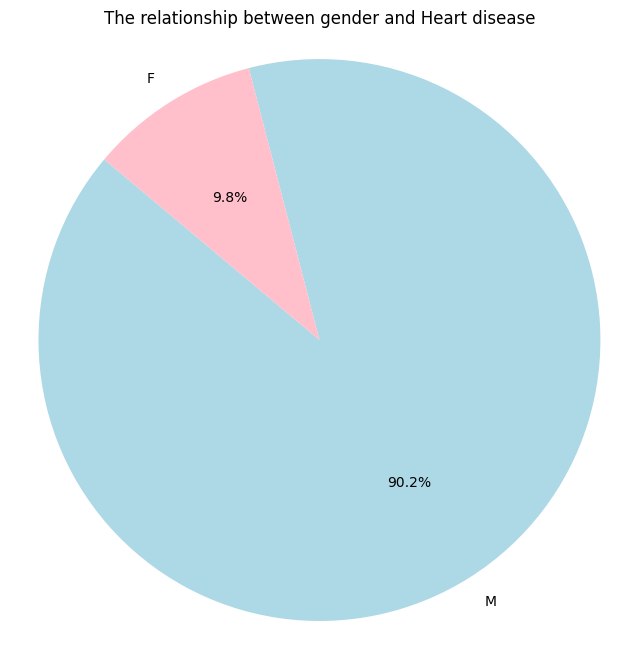

In [30]:
genderDiagnosisCounts = data[data['HeartDisease'] == 1]['Sex'].value_counts();
plt.figure(figsize=(8, 8));
plt.pie(genderDiagnosisCounts, labels=genderDiagnosisCounts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue','pink']);
plt.title('The relationship between gender and Heart disease');
plt.axis('equal');
plt.show();

## Scatter Plot

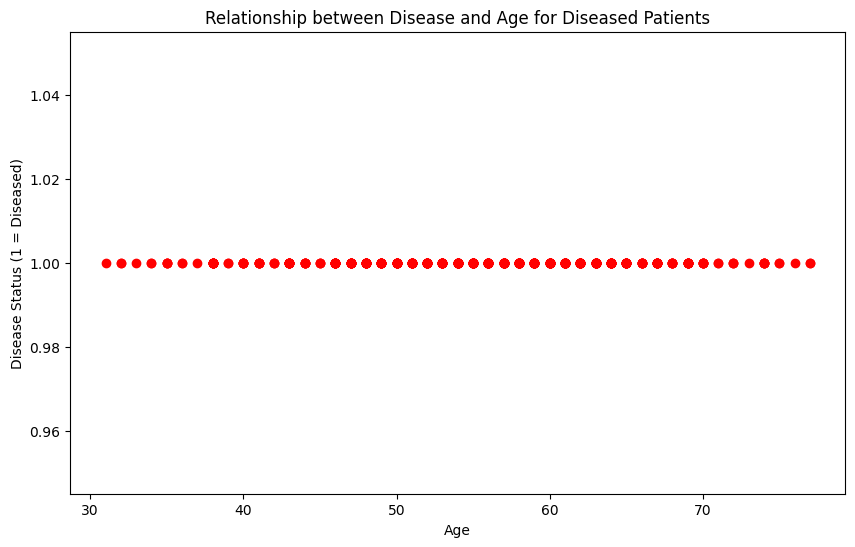

In [35]:
diseased = data[data['HeartDisease'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(diseased['Age'], diseased['HeartDisease'], color='red')
plt.xlabel('Age')
plt.ylabel('Disease Status (1 = Diseased)')
plt.title('Relationship between Disease and Age for Diseased Patients')
plt.show()

# Data Preprocessing 

## Duplicate Values

In [4]:
numDuplicates = data.duplicated().sum()
dataCleaned = data.drop_duplicates()
print("Number of duplicate rows:", numDuplicates)

Number of duplicate rows: 0


## Outliers

In [7]:
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Age: 0 rows with outliers
RestingBP: 28 rows with outliers
Cholesterol: 183 rows with outliers
FastingBS: 214 rows with outliers
MaxHR: 2 rows with outliers
Oldpeak: 16 rows with outliers
HeartDisease: 0 rows with outliers
Total Rows with Outliers: 443


In [ ]:
data1 = pd.read_csv('encoding_normaliztion.csv')
data1.groupby('Gender').agg('max')
data1.groupby(['Gender', 'Selector']).agg('mean')